DSCI 552: Homework #6

Michael Hanono

1426377592

November 2021

In [ ]:
!pip install pandas
!pip install -U scikit-learn
!pip install numpy
!pip install matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances
import statistics
from statistics import mode
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import KMeans, SpectralClustering
from scipy.special import softmax
from scipy.spatial.distance import cdist
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold
from statistics import mode
import random
from sklearn.svm import LinearSVC
from math import ceil, sqrt
warnings.filterwarnings('always')

1. Supervised, Semi-Supervised, and Unsupervised Learning

    (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
# Read the data from the file
data = pd.read_csv('../data/wdbc.data', header=None)
data.head(569)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


    (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [18]:
# Get the negative and positive data into data frames
negativeData = data[data[1]=='B']
positiveData = data[data[1]=='M']

# Separate negative data into X and Y
negativeDataX = negativeData.drop(columns=[0, 1])
negativeDataY = negativeData[[0, 1]].copy()

# Separate the negative data into training and testing sets
negativeDataXTraining , negativeDataXTesting, negativeDataYTraining, negativeDataYTesting = train_test_split(negativeDataX, negativeDataY, test_size=0.2, random_state=0)

# Separate positive data into X and Y
positiveDataX = positiveData.drop(columns=[0, 1])
positiveDataY = positiveData[[0, 1]].copy()

# Separate the positive data into training and testing sets
positiveDataXTraining, positiveDataXTesting, positiveDataYTraining, positiveDataYTesting = train_test_split(positiveDataX, positiveDataY, test_size=0.2, random_state=0)

# Get the training sets by appending the positive to the negative data
trainingX = negativeDataXTraining.append(positiveDataXTraining)
trainingY = negativeDataYTraining.append(positiveDataYTraining)

# Get the testing sets by appending the positive to the negative data
testingX = negativeDataXTesting.append(positiveDataXTesting)
testingY = negativeDataYTesting.append(positiveDataYTesting)

    i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [19]:
# Define the normalizer for the data in the training set
transformer = MinMaxScaler().fit(trainingX)
trainingXNormalized = transformer.transform(trainingX)

# Define the normalizer for the data in the testing set
testingXNormalized = transformer.transform(testingX)

# Get Boolean training Y set
trainingBooleanY = []
for i in trainingY[1]:
    if i == 'B':
        trainingBooleanY.append(0)
    elif i == 'M':
        trainingBooleanY.append(1)
        
# Get Boolean testing Y set
testingBooleanY = []
for i in testingY[1]:
    if i == 'B':
        testingBooleanY.append(0)
    elif i == 'M':
        testingBooleanY.append(1)

In [5]:
# Define the range of C and G, also get the parameter dictionary
cRange = np.logspace(-2, 7, 10)
gammaRange = np.arange(0.1, 1, 0.1)
parameterDict = dict(C=cRange)

# Define the L1 Penalized Classifier for the model and train it
l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingXNormalized, trainingBooleanY)

# Define the parameter grid with GridSearch Cross Validation and fit it to the training and testing set
parameterGrid = GridSearchCV(l1PenalizedClassifier, param_grid=parameterDict, cv=5, n_jobs=-1)
parameterGrid.fit(trainingXNormalized, trainingBooleanY)

# Get the best C and the best Score
bestC = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best C-parameter is {bestC}, which has a score of {bestScore}.')

# Train the L1 Penalzied Classifier
l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, C=bestC['C'], max_iter=100000)
l1PenalizedClassifier = CalibratedClassifierCV(l1PenalizedClassifier).fit(trainingXNormalized, trainingBooleanY)

The best C-parameter is {'C': 10.0}, which has a score of 0.9625396825396825.


Confusion Matrix for training data: 
[[285   0]
 [ 15 154]]
Training True Negative:  285
Training False Positive:  0
Training False Negative:  15
Training True Positive:  154
Accuracy for the training set: 0.9669603524229075. 

Precision for the training set: 1.0. 

Recall for the training set: 0.9112426035502958. 

F1 Score for the training set: 0.9535603715170279. 

AUC for the training set: 0.9556213017751479. 

ROC Curve for the training data: 


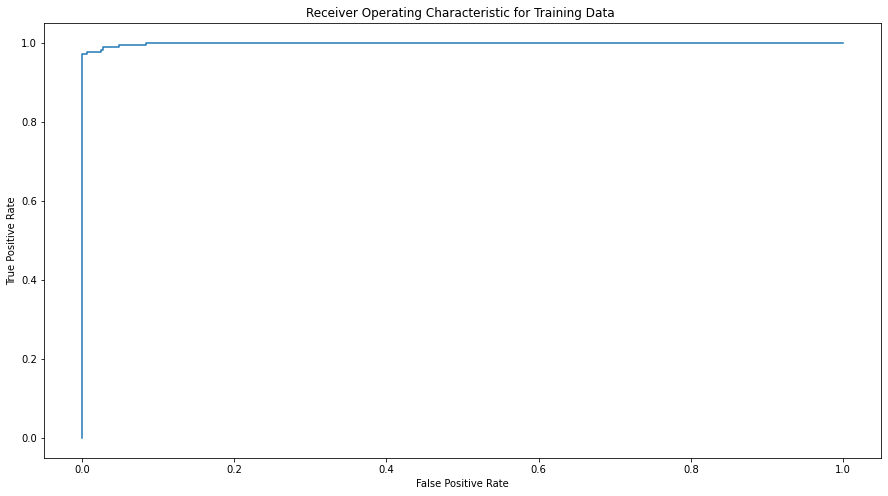

In [6]:
# Predict the data with the L1 Penalized Classifier
l1PenalizedClassifierPredictTrain = l1PenalizedClassifier.predict(trainingXNormalized)

# Print the confusion matrix for the model
print('Confusion Matrix for training data: ')
print(confusion_matrix(trainingBooleanY, l1PenalizedClassifierPredictTrain))

# Get rates from confusion matrix
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(trainingBooleanY, l1PenalizedClassifierPredictTrain).ravel()
print('Training True Negative: ', trueNegative)
print('Training False Positive: ', falsePositive)
print('Training False Negative: ', falseNegative)
print('Training True Positive: ', truePositive)

# Get accuracy, precision, recall, f1 Score, and AUC
accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
print(f'Accuracy for the training set: {accuracy}. \n')
precision = truePositive / (falsePositive + truePositive)
print(f'Precision for the training set: {precision}. \n')
recall = truePositive / (falseNegative + truePositive)
print(f'Recall for the training set: {recall}. \n')
f1Score = 2*(precision * recall) / (precision + recall)
print(f'F1 Score for the training set: {f1Score}. \n')
AUC = roc_auc_score(trainingBooleanY, l1PenalizedClassifierPredictTrain, average=None)
print(f'AUC for the training set: {AUC}. \n')

# Print the ROC curve for the training data
print('ROC Curve for the training data: ')
probTraining = l1PenalizedClassifier.predict_proba(trainingXNormalized)[:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(trainingBooleanY, probTraining)
plt.figure(figsize=(15,8))
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data ')
plt.show()

Confusion Matrix for training data: 
[[72  0]
 [ 2 41]]
Testing True Negative:  72
Testing False Positive:  0
Testing False Negative:  2
Testing True Positive:  41
Accuracy for the testing set: 0.9826086956521739. 

Precision for the testing set: 1.0. 

Recall for the testing set: 0.9534883720930233. 

F1 Score for the testing set: 0.9761904761904763. 

AUC for the testing set: 0.9556213017751479. 

ROC Curve for the testing data: 


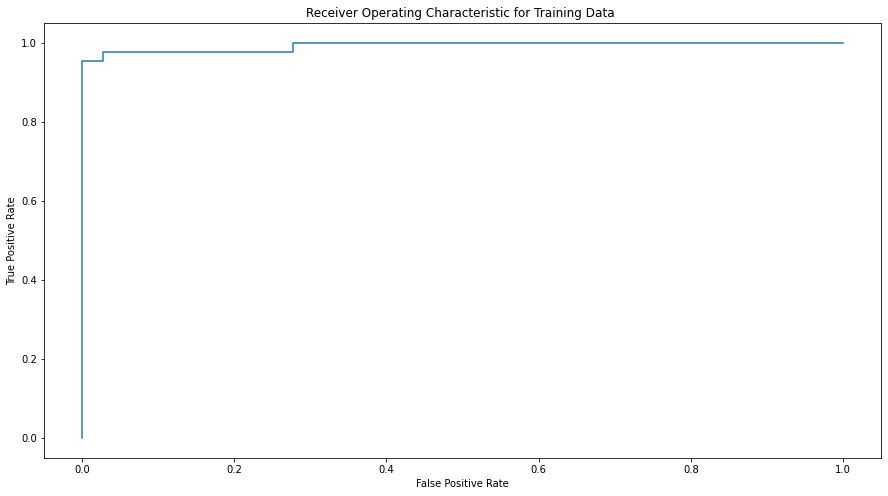

In [7]:
# Predict the data with the L1 Penalized Classifier
l1PenalizedClassifierPredictTest = l1PenalizedClassifier.predict(testingXNormalized)

# Print confusion matrix for the model
print('Confusion Matrix for training data: ')
print(confusion_matrix(testingBooleanY, l1PenalizedClassifierPredictTest))

# Get rates from confusion matrix
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(testingBooleanY, l1PenalizedClassifierPredictTest).ravel()
print('Testing True Negative: ', trueNegative)
print('Testing False Positive: ', falsePositive)
print('Testing False Negative: ', falseNegative)
print('Testing True Positive: ', truePositive)

# Get accuracy, precision, recall, f1 Score, and AUC
accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
print(f'Accuracy for the testing set: {accuracy}. \n')
precision = truePositive / (falsePositive + truePositive)
print(f'Precision for the testing set: {precision}. \n')
recall = truePositive / (falseNegative + truePositive)
print(f'Recall for the testing set: {recall}. \n')
f1Score = 2*(precision * recall) / (precision + recall)
print(f'F1 Score for the testing set: {f1Score}. \n')
AUC = roc_auc_score(trainingBooleanY, l1PenalizedClassifierPredictTrain, average=None)
print(f'AUC for the testing set: {AUC}. \n')

# Print the ROC curve for the testing data
print('ROC Curve for the testing data: ')
probTesting = l1PenalizedClassifier.predict_proba(testingXNormalized)[:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(testingBooleanY, probTesting)
plt.figure(figsize=(15,8))
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data ')
plt.show()

In [8]:
def getSupervisedData(trainingX, trainingY, testingX, testingY):
    
    # Define the range for C and gamma with the parameter dictionary
    cRange = np.logspace(-2, 7, 10)
    gammaRange = np.arange(0.1, 1, 0.1)
    parameterDict = dict(C=cRange)
    
    # Define the l1 Penalized Classifier witht the parameter grid for Cross Validation to get the best C
    l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, max_iter=100000).fit(trainingXNormalized, trainingBooleanY)
    parameterGrid = GridSearchCV(l1PenalizedClassifier, param_grid=parameterDict, cv=5, n_jobs=-1)
    parameterGrid.fit(trainingX, trainingY)
    bestC = parameterGrid.best_params_
    
    # Re define the model with the best C and train it
    l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, C=bestC['C'], max_iter=100000)
    l1PenalizedClassifier = CalibratedClassifierCV(l1PenalizedClassifier).fit(trainingX, trainingY)
    
    # Get a list of training scores and calculate the rates with the confusion matrix
    trainingScores = []
    l1PenalizedClassifierPredictTrain = l1PenalizedClassifier.predict(trainingX)
    trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(trainingY, l1PenalizedClassifierPredictTrain).ravel()
    
    # Get the accuracy, precision, recall, f1 score, and AUC for the training data
    accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
    trainingScores.append(accuracy)
    precision = truePositive / (falsePositive + truePositive)
    trainingScores.append(precision)
    recall = truePositive / (falseNegative + truePositive)
    trainingScores.append(recall)
    f1Score = 2*(precision * recall) / (precision + recall)
    trainingScores.append(f1Score)
    AUC = roc_auc_score(trainingY, l1PenalizedClassifierPredictTrain, average=None)
    trainingScores.append(AUC)
    
    # Get a list of testing scores and calculate the rates with the confusion matrix
    testingScores = []
    l1PenalizedClassifierPredictTest = l1PenalizedClassifier.predict(testingX)
    trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(testingY, l1PenalizedClassifierPredictTest).ravel()
    
    # Get the accuracy, precision, recall, f1 score, and AUC for the testing data
    accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
    testingScores.append(accuracy)
    precision = truePositive / (falsePositive + truePositive)
    testingScores.append(precision)
    recall = truePositive / (falseNegative + truePositive)
    testingScores.append(recall)
    f1Score = 2*(precision * recall) / (precision + recall)
    testingScores.append(f1Score)
    AUC = roc_auc_score(testingY, l1PenalizedClassifierPredictTest, average=None)
    testingScores.append(AUC)
    
    # Append both list to and output list and return it
    output = []
    output.append(trainingScores)
    output.append(testingScores)
    return output

In [9]:
# Ignore warnings and get lists to store scores
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
trainingScores = []
testingScores = []

# Run the simulation 30 times and append the scores to the lists for each run
for i in range(30):
    scores = getSupervisedData(trainingXNormalized, trainingBooleanY, testingXNormalized, testingBooleanY)
    trainingScores.append(scores[0])
    testingScores.append(scores[1])

In [11]:
# Define the dictionary to store the accuracy, precision, recall, f1 score, and AUC for the training data
trainingScoresDict = {}
trainingScoresDict['Accuracy'] = []
trainingScoresDict['Precision'] = []
trainingScoresDict['Recall'] = []
trainingScoresDict['F1-Score'] = []
trainingScoresDict['AUC'] = []

# Iterate over the scores and append them to the dictionary
for scores in trainingScores:
    trainingScoresDict['Accuracy'].append(scores[0])
    trainingScoresDict['Precision'].append(scores[1])
    trainingScoresDict['Recall'].append(scores[2])
    trainingScoresDict['F1-Score'].append(scores[3])
    trainingScoresDict['AUC'].append(scores[4])

# Calculate the average of the scores
trainingScoresAverage = {}
for key, value in trainingScoresDict.items():
    trainingScoresAverage[key] = sum(value)/len(value)

# Print the average of the scores
print('Average scores for the test data after supervised learning:\n')
for i in trainingScoresAverage:
    print(f'\t{i}: {trainingScoresAverage[i]}')

# Define the dictionary to store the accuracy, precision, recall, f1 score, and AUC for the testing data
testingScoresDict = {}
testingScoresDict['Accuracy'] = []
testingScoresDict['Precision'] = []
testingScoresDict['Recall'] = []
testingScoresDict['F1-Score'] = []
testingScoresDict['AUC'] = []

# Iterate over the scores and append them to the dictionary
for scores in testingScores:
    testingScoresDict['Accuracy'].append(scores[0])
    testingScoresDict['Precision'].append(scores[1])
    testingScoresDict['Recall'].append(scores[2])
    testingScoresDict['F1-Score'].append(scores[3])
    testingScoresDict['AUC'].append(scores[4])
    
# Calculate the average of the scores
testingScoresAverage = {}
for key, value in testingScoresDict.items():
    testingScoresAverage[key] = sum(value)/len(value)

# Print the average of the scores
print('\nAverage scores for the test data after supervised learning:\n')
for i in testingScoresAverage:
    print(f'\t{i}: {testingScoresAverage[i]}')

Average scores for the test data after supervised learning:

	Accuracy: 0.9669603524229079
	Precision: 1.0
	Recall: 0.9112426035502957
	F1-Score: 0.9535603715170281
	AUC: 0.9556213017751486

Average scores for the test data after supervised learning:

	Accuracy: 0.9826086956521742
	Precision: 1.0
	Recall: 0.9534883720930233
	F1-Score: 0.9761904761904755
	AUC: 0.9767441860465108


    ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.


In [5]:
# Append the training normalized data to the predictors
trainingNormalized = pd.DataFrame(trainingBooleanY).merge(pd.DataFrame(trainingXNormalized) , left_index=True, right_index=True)
trainingNormalized.columns = [*range(31)]

# Append the testing normalized data to the predictors
testingNormalized = pd.DataFrame(testingBooleanY).merge(pd.DataFrame(testingXNormalized) , left_index=True, right_index=True)
testingNormalized.columns = [*range(31)]

# Break the data into positive and negative training data
negativeTrainingData = trainingNormalized[trainingNormalized[0]==0]
positiveTrainingData = trainingNormalized[trainingNormalized[0]==1]

# Break the data into negative labeled and unlabeled
negativeLabelled = negativeTrainingData.sample(frac=0.5)
negativeUnlabelled = negativeTrainingData[~negativeTrainingData.isin(negativeLabelled)].dropna()

# Break the data into positive labelled and unlabelled
positiveLabelled = positiveTrainingData.sample(frac=0.5)
positiveUnlabelled = positiveTrainingData[~positiveTrainingData.isin(positiveLabelled)].dropna()

# Append the dictionaries to get the labelled and labelled datasets. Shuffle the data
labelled = negativeLabelled.append(positiveLabelled)
unlabelled = negativeUnlabelled.append(positiveUnlabelled)
labelled = labelled.sample(frac=1)
unalbelled = unlabelled.sample(frac=1)

# Get the labelled X and Y
labelledX = labelled.iloc[:,1:]
labelledYBoolean = labelled.iloc[:,0]
labelledXSS = labelled.iloc[:,1:].copy(deep=True)
labelledYBooleanSS = labelled.iloc[:,0].copy(deep=True)

# Get the unlabelled X and Y
unlabelledX = unlabelled.iloc[:,1:]
unlabelledYBoolean = unlabelled.iloc[:,0]
unlabelledXSS = unlabelled.iloc[:,1:].copy(deep=True)
unlabelledYBooleanSS = unlabelled.iloc[:,0].copy(deep=True)

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [13]:
# Get the range of C and the parameter dictionary for the model
cRange = np.logspace(-2, 7, 10)
parameterDict = dict(C=cRange)

# Define the L1 Penalized Classifier and fit it with the labelled data
l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, max_iter=10000000).fit(labelledX, labelledYBoolean)

# Get the parameter grid for Cross Validation and get the best C
parameterGrid = GridSearchCV(l1PenalizedClassifier, param_grid=parameterDict, cv=5, n_jobs=-1)
parameterGrid.fit(labelledX, labelledYBoolean)
bestC = parameterGrid.best_params_
bestScore = parameterGrid.best_score_
print(f'The best C-parameter is {bestC}, which has a score of: {bestScore}')

# Retrain the model with the best C
l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, C=bestC['C'], max_iter=10000000).fit(labelledX, labelledYBoolean)

The best C-parameter is {'C': 1.0}, which has a score of: 0.9602898550724637


    B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [14]:
# Create copies of labelled X and unlabelled X
labelledX2 = labelledX.copy()
unlabelledX2 = unlabelledX.copy()

# Get the distance 
unlabelledXDist = pd.DataFrame(data=np.array(unlabelledX2))
y = l1PenalizedClassifier.decision_function(np.array(unlabelledX2))
normW = np.linalg.norm(l1PenalizedClassifier.coef_)
dist = y/abs(normW)

# Add the distance to the unlabelled distance dataframe
dist = pd.Series(dist)
unlabelledXDist.insert(loc=0, column='Dist', value=dist)
unlabelledXDist.head(228)

,Dist,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,-0.151043,0.326045,0.371660,0.317739,0.187349,0.389546,0.282241,0.086410,0.117744,0.282828,...,0.282540,0.339286,0.272570,0.155045,0.398399,0.171154,0.109984,0.235223,0.134831,0.195986
1,-0.332228,0.279663,0.115320,0.263285,0.158098,0.152749,0.061331,0.052952,0.058201,0.139899,...,0.225794,0.093817,0.206775,0.120673,0.180264,0.084806,0.094728,0.184399,0.146659,0.092549
2,-0.223593,0.206304,0.300981,0.200193,0.105158,0.471879,0.224676,0.100797,0.128926,0.437879,...,0.180159,0.293443,0.160657,0.090366,0.556373,0.126233,0.129712,0.293540,0.294697,0.083891
3,0.043095,0.302854,0.710517,0.294036,0.175632,0.359484,0.187932,0.066050,0.162227,0.159091,...,0.282540,0.788646,0.258706,0.160281,0.332035,0.111389,0.055935,0.266770,0.124384,0.142398
4,-0.318271,0.284396,0.152858,0.278419,0.157419,0.379074,0.274878,0.087582,0.104274,0.298990,...,0.229762,0.130330,0.206663,0.120365,0.310395,0.165139,0.115815,0.201031,0.170905,0.300800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.500468,0.457617,0.394657,0.457536,0.323116,0.536878,0.432573,0.357310,0.455765,0.472222,...,0.735317,0.520789,0.707642,0.625169,0.788646,0.320662,0.375000,0.719931,0.403706,0.266299
224,0.117962,0.353495,0.355428,0.350356,0.211930,0.416087,0.346620,0.276476,0.297217,0.449495,...,0.412698,0.482409,0.377271,0.264507,0.606146,0.367038,0.396725,0.631615,0.628425,0.303424
225,0.096971,0.323678,0.499831,0.335429,0.192061,0.573892,0.509280,0.317948,0.335934,0.613636,...,0.320635,0.557569,0.310750,0.185660,0.780711,0.358306,0.270048,0.522680,0.411197,0.414929
226,0.232670,0.521984,0.366926,0.515583,0.366589,0.428546,0.375043,0.274133,0.385785,0.533333,...,0.539683,0.374200,0.519817,0.382161,0.430859,0.199290,0.203195,0.511684,0.332348,0.139118


In [15]:
# Iterate over the rows of the unlabelled dataframe
while len(unlabelledXDist) > 0:
    maximum = 0
    index = 0
    maxIndex = 0
    
    # While the dataframe still has rows continue
    while index < len(unlabelledXDist):
        
        # Get the distance of that specific row to find the minimum distance
        row = unlabelledXDist.iloc[index]
        rowL = list(row)
        distp = rowL[0]
        distp = abs(distp)
        if distp > maximum:
            maximum = distp
            maxIndex = index  
        index += 1
    
    # Drop the rows from the unlabelled data frame
    row = unlabelledXDist.iloc[[maxIndex]]
    row = row.drop(columns=['Dist'])
    
    # Predict the value of the row with the classifier
    pointPredict = l1PenalizedClassifier.predict(row)
    pointPredict = int(pointPredict)
    
    # Append the prediction to the new dataframe 
    labelledX2 = labelledX2.append(row, ignore_index=True)
    labelledYBoolean.append(pd.Series(pointPredict))
    
    # Train the model with the new data
    l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, max_iter=10000000).fit(labelledX2, labelledYBoolean)
    
    # Get the parameter grid for Cross Validation and the best C
    parameterGrid = GridSearchCV(l1PenalizedClassifier, param_grid=parameterDict, cv=5, n_jobs=-1)
    parameterGrid.fit(labelledX2, labelledYBoolean)
    bestC = parameterGrid.best_params_
    
    # Retrain the model with the new C
    l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, C=bestC['C'], max_iter=10000000).fit(labelledX2, labelledYBoolean)

    # Drop the rows from the unlabelled dataframe
    unlabelledXDist = unlabelledXDist.drop(unlabelledXDist.iloc[maxIndex].name, inplace=False)
    unlabelledXDist = unlabelledXDist.reset_index(drop=True)
    
    # Delete the variables
    del maxIndex
    del index
    del maximum

Confusion Matrix for the training set: 
[[284   1]
 [ 11 158]]
Training True Negative:  284
Training False Positive:  1
Training False Negative:  11
Training True Positive:  158
Accuracy for the training set: 0.973568281938326. 

Precision for the training set: 0.9937106918238994. 

Recall for the training set: 0.9349112426035503. 

F1 Score for the training set: 0.9634146341463414. 

AUC for the training set: 0.9657012353368628. 

ROC Curve for the training data: 


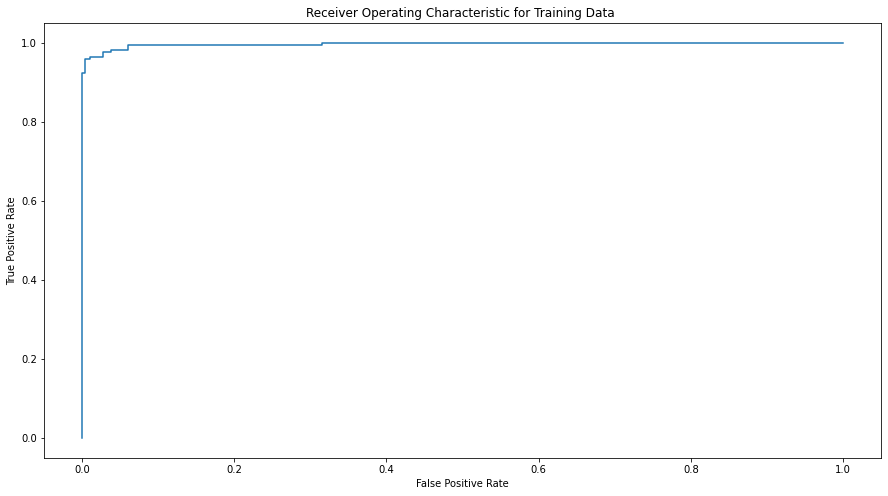

In [16]:
# Train the classifier with the normalized training data and predict the data
l1PenalizedClassifier = CalibratedClassifierCV(l1PenalizedClassifier).fit(trainingXNormalized, trainingBooleanY)
l1PenalizedClassifierPredictTrain = l1PenalizedClassifier.predict(trainingXNormalized)

# Get the confusion matrix for the training data and the rates
print('Confusion Matrix for the training set: ')
print(confusion_matrix(trainingBooleanY, l1PenalizedClassifierPredictTrain))
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(trainingBooleanY, l1PenalizedClassifierPredictTrain).ravel()
print('Training True Negative: ', trueNegative)
print('Training False Positive: ', falsePositive)
print('Training False Negative: ', falseNegative)
print('Training True Positive: ', truePositive)

# Calculate accuracy, precision, recall, f1 score, and AUC for the training data
accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
print(f'Accuracy for the training set: {accuracy}. \n')
precision = truePositive / (falsePositive + truePositive)
print(f'Precision for the training set: {precision}. \n')
recall = truePositive / (falseNegative + truePositive)
print(f'Recall for the training set: {recall}. \n')
f1Score = 2*(precision * recall) / (precision + recall)
print(f'F1 Score for the training set: {f1Score}. \n')
AUC = roc_auc_score(trainingBooleanY, l1PenalizedClassifierPredictTrain, average=None)
print(f'AUC for the training set: {AUC}. \n')

# Print the ROC curve for the training data
print('ROC Curve for the training data: ')
probTraining = l1PenalizedClassifier.predict_proba(trainingXNormalized)[:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(trainingBooleanY, probTraining)
plt.figure(figsize=(15,8))
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data ')
plt.show()

Confusion Matrix for the testing set: 
[[72  0]
 [ 2 41]]
Testing True Negative:  72
Testing False Positive:  0
Testing False Negative:  2
Testing True Positive:  41
Accuracy for the testing set: 0.9826086956521739. 

Precision for the testing set: 1.0. 

Recall for the testing set: 0.9534883720930233. 

F1 Score for the testing set: 0.9761904761904763. 

AUC for the testing set: 0.9657012353368628. 

ROC Curve for the testing data: 


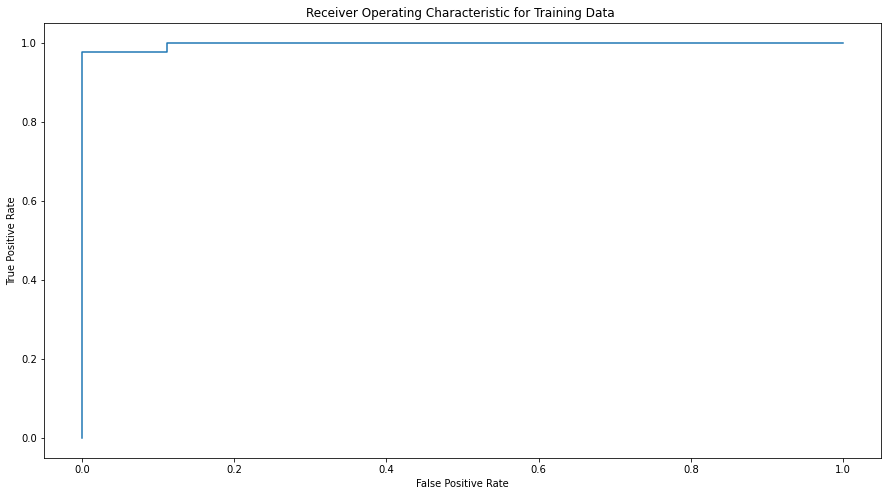

In [17]:
# Train the classifier with the normalized training data and predict the data
l1PenalizedClassifier = CalibratedClassifierCV(l1PenalizedClassifier).fit(testingXNormalized, testingBooleanY)
l1PenalizedClassifierPredictTest = l1PenalizedClassifier.predict(testingXNormalized)

# Get the confusion matrix for the testing data and the rates
print('Confusion Matrix for the testing set: ')
print(confusion_matrix(testingBooleanY, l1PenalizedClassifierPredictTest))
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(testingBooleanY, l1PenalizedClassifierPredictTest).ravel()
print('Testing True Negative: ', trueNegative)
print('Testing False Positive: ', falsePositive)
print('Testing False Negative: ', falseNegative)
print('Testing True Positive: ', truePositive)

# Calculate accuracy, precision, recall, f1 score, and AUC for the testing data
accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
print(f'Accuracy for the testing set: {accuracy}. \n')
precision = truePositive / (falsePositive + truePositive)
print(f'Precision for the testing set: {precision}. \n')
recall = truePositive / (falseNegative + truePositive)
print(f'Recall for the testing set: {recall}. \n')
f1Score = 2*(precision * recall) / (precision + recall)
print(f'F1 Score for the testing set: {f1Score}. \n')
AUC = roc_auc_score(trainingBooleanY, l1PenalizedClassifierPredictTrain, average=None)
print(f'AUC for the testing set: {AUC}. \n')

# Print the ROC curve for the testing data
print('ROC Curve for the testing data: ')
probTesting = l1PenalizedClassifier.predict_proba(testingXNormalized)[:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(testingBooleanY, probTesting)
plt.figure(figsize=(15,8))
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data ')
plt.show()

In [6]:
def getSemisupervisedData(labelledX_2, labelledY_2, unlabelledX_2, unlabelledY_2,
                                  trainingXNormalized_2, trainingBooleanY_2, testingXNormalized_2, testingBooleanY_2):
    
    # Create copies of the dataframes
    labelledX_ = labelledX_2.copy()
    labelledY_ = labelledY_2.copy()
    unlabelledX_ = unlabelledX_2.copy()
    unlabelledY_ = unlabelledY_2.copy()
    trainingXNormalized_ = trainingXNormalized_2.copy()
    trainingBooleanY_ = trainingBooleanY_2.copy()
    testingXNormalized_ = testingXNormalized_2.copy()
    testingBooleanY_ = testingBooleanY_2.copy()
    
    # Define the range for C and the parameter dictionary
    cRange = np.logspace(-2, 7, 10)
    parameterDict = dict(C=cRange)

    # Train the first model with the labelled data
    l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, max_iter=10000000).fit(labelledX_, labelledY_)

    # Get the parameter grid for Cross Validation and find the best C
    parameterGrid = GridSearchCV(l1PenalizedClassifier, param_grid=parameterDict, cv=5, n_jobs=-1)
    parameterGrid.fit(labelledX_, labelledY_)
    bestC = parameterGrid.best_params_
   
    # Retrain the model with the newly found C
    l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, C=bestC['C'], max_iter=10000000).fit(labelledX_, labelledY_)

    # Calculate the distances and add them to the dataframe
    unlabelledXDist = pd.DataFrame(data=unlabelledX_)
    y = l1PenalizedClassifier.decision_function(unlabelledX_)
    normW = np.linalg.norm(l1PenalizedClassifier.coef_)
    dist = y/abs(normW)
    dist = pd.Series(dist)
    unlabelledXDist.insert(loc=0, column='Dist', value=dist)
    labelledX_ = pd.DataFrame(labelledX_)
    
    # While the dataframe still has rows continue
    count = 0
    while len(unlabelledXDist) > 0:
        maximum = 0
        index = 0
        maxIndex = 0
        
        # Get the distance of that specific row to find the minimum distance
        while index < len(unlabelledXDist):
            row = unlabelledXDist.iloc[index]
            rowL = list(row)
            distp = rowL[0]
            distp = abs(distp)
            if distp > maximum:
                maximum = distp
                maxIndex = index
            index += 1
        
        # Predict the value of the row with the classifier
        row = unlabelledXDist.iloc[[maxIndex]]
        row = row.drop(columns=['Dist'])
        pointPredict = l1PenalizedClassifier.predict(row)
        pointPredict = int(pointPredict)
        
        # Append the prediction to the new dataframe 
        labelledX_ = labelledX_.append(row, ignore_index=True)
        labelledY_ = labelledY_.append(pd.Series(pointPredict))
        
        # Train the model with the new data
        l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, C=bestC['C'], max_iter=10000000).fit(labelledX_, labelledY_)
        
        # Get the parameter grid for Cross Validation and the best C
        parameterGrid = GridSearchCV(l1PenalizedClassifier, param_grid=parameterDict, cv=5, n_jobs=-1)
        parameterGrid.fit(labelledX_, labelledY_)
        bestC = parameterGrid.best_params_
        
        # Retrain the model with the new C
        l1PenalizedClassifier = svm.LinearSVC(penalty='l1', dual=False, C=bestC['C'], max_iter=10000000).fit(labelledX_, labelledY_)
        
        # Drop the rows from the unlabelled dataframe
        unlabelledXDist = unlabelledXDist.drop(unlabelledXDist.iloc[maxIndex].name, inplace=False)
        unlabelledXDist = unlabelledXDist.reset_index(drop=True)
        
        # Delete the variables
        del maxIndex 
        del index
        del maximum
        count += 1

    # Train the model and predict it for the training set and define a list to store the scores
    trainingScores = []
    l1PenalizedClassifier = CalibratedClassifierCV(l1PenalizedClassifier).fit(labelledX_, labelledY_)
    l1PenalizedClassifierPredictTrain = l1PenalizedClassifier.predict(trainingXNormalized_)
    
    # Get the rates from the confusion matrix
    trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(trainingBooleanY_, l1PenalizedClassifierPredictTrain).ravel()
    
    # Calculate accuracy, precision, recall, f1 score, and AUC for the training data
    accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
    trainingScores.append(accuracy)
    precision = truePositive / (falsePositive + truePositive)
    trainingScores.append(precision)
    recall = truePositive / (falseNegative + truePositive)
    trainingScores.append(recall)
    f1Score = 2*(precision * recall) / (precision + recall)
    trainingScores.append(f1Score)
    AUC = roc_auc_score(trainingBooleanY, l1PenalizedClassifierPredictTrain, average=None)
    trainingScores.append(AUC)

    # Train the model and predict it for the testing set and define a list to store the scores
    testingScores = []
    l1PenalizedClassifierPredictTest = l1PenalizedClassifier.predict(testingXNormalized_)
    trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(testingBooleanY_, l1PenalizedClassifierPredictTest).ravel()
    
    # Calculate accuracy, precision, recall, f1 score, and AUC for the testing data
    accuracy = (trueNegative + truePositive) / (trueNegative + falsePositive + falseNegative + truePositive)
    testingScores.append(accuracy)
    precision = truePositive / (falsePositive + truePositive)
    testingScores.append(precision)
    recall = truePositive / (falseNegative + truePositive)
    testingScores.append(recall)
    f1Score = 2*(precision * recall) / (precision + recall)
    testingScores.append(f1Score)
    AUC = roc_auc_score(testingBooleanY, l1PenalizedClassifierPredictTest, average=None)
    testingScores.append(AUC)
    
    # Define a list for output, append the values, and return it
    output = []
    output.append(trainingScores)
    output.append(testingScores)
    return output

In [ ]:
# Define lists to store the scores
trainingScores = []
testingScores = []

# Do the simulation 30 times and append the scores to the respective lists
for i in range(30):
    scores = getSemisupervisedData(labelledXSS, labelledYBooleanSS, unlabelledXSS, unlabelledYBooleanSS,
                                  trainingXNormalized, trainingBooleanY, testingXNormalized, testingBooleanY)
    print(i)
    trainingScores.append(scores[0])
    testingScores.append(scores[1])

In [8]:
# Define the dictionary to store the accuracy, precision, recall, f1 score, and AUC for the training data
trainingScoresDict = {}
trainingScoresDict['Accuracy'] = []
trainingScoresDict['Precision'] = []
trainingScoresDict['Recall'] = []
trainingScoresDict['F1-Score'] = []
trainingScoresDict['AUC'] = []

# Iterate over the scores and append them to the dictionary
for scores in trainingScores:
    trainingScoresDict['Accuracy'].append(scores[0])
    trainingScoresDict['Precision'].append(scores[1])
    trainingScoresDict['Recall'].append(scores[2])
    trainingScoresDict['F1-Score'].append(scores[3])
    trainingScoresDict['AUC'].append(scores[4])

# Calculate the average of the scores
trainingScoresAverage = {}
for key, value in trainingScoresDict.items():
    trainingScoresAverage[key] = sum(value)/len(value)

# Print the average of the scores
print('Average scores for the test data after supervised learning:\n')
for i in trainingScoresAverage:
    print(f'\t{i}: {trainingScoresAverage[i]}')

# Define the dictionary to store the accuracy, precision, recall, f1 score, and AUC for the testing data
testingScoresDict = {}
testingScoresDict['Accuracy'] = []
testingScoresDict['Precision'] = []
testingScoresDict['Recall'] = []
testingScoresDict['F1-Score'] = []
testingScoresDict['AUC'] = []

# Iterate over the scores and append them to the dictionary
for scores in testingScores:
    testingScoresDict['Accuracy'].append(scores[0])
    testingScoresDict['Precision'].append(scores[1])
    testingScoresDict['Recall'].append(scores[2])
    testingScoresDict['F1-Score'].append(scores[3])
    testingScoresDict['AUC'].append(scores[4])
    
# Calculate the average of the scores
testingScoresAverage = {}
for key, value in testingScoresDict.items():
    testingScoresAverage[key] = sum(value)/len(value)

# Print the average of the scores
print('\nAverage scores for the test data after supervised learning:\n')
for i in testingScoresAverage:
    print(f'\t{i}: {testingScoresAverage[i]}')

Average scores for the test data after supervised learning:

	Accuracy: 0.9631424375917774
	Precision: 0.968484813044721
	Recall: 0.9313609467455624
	F1-Score: 0.9495201459875111
	AUC: 0.9566746254195643

Average scores for the test data after supervised learning:

	Accuracy: 0.9524637681159417
	Precision: 0.964879835611543
	Recall: 0.9062015503875975
	F1-Score: 0.9343296668260801
	AUC: 0.943147071490095


    iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

    A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

    To make sure that the algorithm doesn't get trapped in a local minimum, one should randomly initialize the cluster centroids several times as well as running the K-Means alogrithm several times. Running the algorithm with different initializations of centroids can help to avoid the algorithm from getting stuck in local minimum. In the code above, we can see that the outer loop initializes the K-Means algorithm randomly, and then the inner loop initialized the K-Means randomly with randomly selected centroids to produce the centroids with the best inertia. 

    B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1


In [3]:
# Create a function that will split the data into the testing and training X and Y sets
def splitRandom(data):
    bIndex = list(data[data[1] == 'B'].index)
    mIndex = list(data[data[1] == 'M'].index)
    selectedB = random.sample(bIndex, k = ceil(len(bIndex)*.2))
    selectedM = random.sample(mIndex, k = ceil(len(mIndex)*.2))
    testIndex = selectedB + selectedM
    trainIdx = list(set(data.index) - set(testIndex))
    # Select the appropriate columns
    trainingX = data.iloc[trainIdx,2:]
    trainingY = data.iloc[trainIdx,1]
    testingX = data.iloc[testIndex,2:]
    testingY = data.iloc[testIndex,1]
    return trainingX, trainingY, testingX, testingY

In [17]:
# Define the dictionaries that will hold the testing and training scores
trainingResults = {'accuracy':[], 'precision':[], 'recall':[], 'f1 score':[], 'AUC':[]}
testingResults = {'accuracy':[], 'precision':[], 'recall':[], 'f1 score':[], 'AUC':[]}

# Iterate 30 times for the montecarlo simulation
for i in range(30):
    print(f'Iteration {i}')
    
    # Split the testing and training data
    trainingX_, trainingY_, testingX_, testingY_ = splitRandom(data) 
    trainingX_.reset_index(drop = True, inplace=True)
    trainingY_.reset_index(drop = True, inplace=True)
    testingX_.reset_index(drop = True, inplace=True)
    testingY_.reset_index(drop = True, inplace=True)
    
    # Normalize the data
    normalizer = MinMaxScaler()
    trainingXNorm = normalizer.fit_transform(trainingX_)
    testingXNorm = normalizer.transform(testingX_)
    
    # Define the KMeans model used and predict the model with the training X normalized
    kMeans = KMeans(n_clusters=2, random_state=i+1, n_init=12).fit(trainingXNorm)
    trainingYPredict = kMeans.predict(trainingXNorm)

    # Get the distances for the training data with the probabilities
    trainingDistance = kMeans.transform(trainingX_)
    trainingProbability = softmax(trainingDistance, axis=1).astype(np.float64)
    
    #Get the distances and the probabilities for the testing data
    testingDistance = kMeans.transform(testingX_)
    testingProbability = softmax(testingDistance, axis=1).astype(np.float64)
    
    # Find the ones that are the most close to the centroids
    j = list(enumerate(trainingDistance))
    closeTo0 = sorted(j, key = lambda x: x[1][0])[:30]
    closeTo1 = sorted(j, key = lambda x: x[1][1])[:30]
    class0 = [x[0] for x in closeTo0]
    class1 = [x[0] for x in closeTo1]
    occursMost0 = mode(trainingY_[class0])
    occursMost1 = mode(trainingY_[class1])
    trainingPredictLabel = np.where(trainingYPredict == 0, occursMost0, occursMost1)

    # Find the most occuring label in the prediction
    if sum(trainingYPredict == 0) >= sum(trainingYPredict == 1):
        trainingPositive =0
    else:
        trainingPositive = 1

    # Get the classification report, rates, accuracy, precision, recall, f1 score, and AUC for the training data
    trainingClassificationReport = classification_report(y_true=trainingY_, y_pred=trainingPredictLabel, output_dict = True)
    falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=trainingY_, y_score=trainingProbability[:,trainingPositive], pos_label = 'M' )
    AUC = auc(falsePositiveRate, truePositiveRate)
    trainingResults['accuracy'].append(trainingClassificationReport['accuracy'])
    trainingResults['precision'].append(trainingClassificationReport['weighted avg']['precision'])
    trainingResults['recall'].append(trainingClassificationReport['weighted avg']['recall'])
    trainingResults['f1 score'].append(trainingClassificationReport['weighted avg']['f1-score'])
    trainingResults['AUC'].append(AUC)

    # Predict the model with testing normalized data
    testingYPredict = kMeans.predict(testingXNorm)
    testingPredictLabel = np.where(testingYPredict == 0, occursMost0, occursMost1)

    # Find the most occuring label in the prediction
    if sum(testingYPredict == 0) >= sum(testingYPredict == 1):
        testingPositive = 0
    else:
        testingPositive = 1

    # Get the classification report, rates, accuracy, precision, recall, f1 score, and AUC for the testing data
    testingClassificationReport = classification_report(y_true=testingY_, y_pred=testingPredictLabel, output_dict = True)
    falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=testingY_, y_score=testingProbability[:,testingPositive], pos_label='M' )
    AUC = auc(falsePositiveRate, truePositiveRate)
    testingResults['accuracy'].append(testingClassificationReport['accuracy'])
    testingResults['precision'].append(testingClassificationReport['weighted avg']['precision'])
    testingResults['recall'].append(testingClassificationReport['weighted avg']['recall'])
    testingResults['f1 score'].append(testingClassificationReport['weighted avg']['f1-score'])
    testingResults['AUC'].append(AUC)
    
    # Add the scores to the dictionaries and print them
    testingAccuracy = testingClassificationReport['accuracy']
    trainingAccuracy = trainingClassificationReport['accuracy']
    print(f'Training Accuracy: {testingAccuracy} and Testing Accuracy: {trainingAccuracy}\n')


Iteration 0


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 1
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 2


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 3
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 4


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 5
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 6


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 7
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 8


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 9
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 10


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 11
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 12


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 13
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 14


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 15
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 16


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 17
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 18


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 19
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 20


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 21
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 22


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 23
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 24


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 25
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 26


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 27
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 28


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577

Iteration 29
Training Accuracy: 0.6260869565217392 and Testing Accuracy: 0.6277533039647577



C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde

One Training Set
Confusion Matrix: 
 [[285   0]
 [169   0]]
Accuracy: 0.6277533039647577


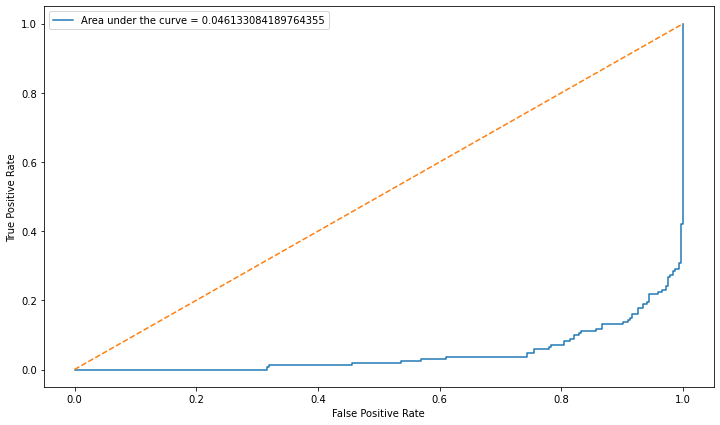

One Testing Set
Confusion Matrix: 
 [[72  0]
 [43  0]]
Accuracy: 0.6260869565217392


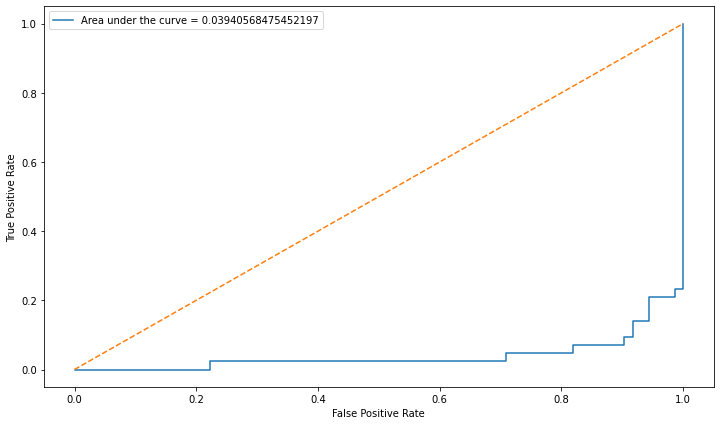

              train      test
accuracy   0.627753  0.626087
precision  0.394074  0.391985
recall     0.627753  0.626087
f1 score   0.484194  0.482120
AUC        0.045426  0.054048


In [7]:
# Print the confusion matrix and ROC curve for one training set
print("One Training Set")
confusionMatrix = confusion_matrix(trainingY_,trainingPredictLabel)
print("Confusion Matrix: \n", confusionMatrix)
trainingAccuracy = trainingClassificationReport['accuracy']
print(f'Accuracy: {trainingAccuracy}')
falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=trainingY_, y_score=trainingProbability[:,trainingPositive], pos_label = 'M' )
AUC = auc(falsePositiveRate, truePositiveRate)
fig,axes = plt.subplots(figsize=(12,7))
axes.plot(falsePositiveRate, truePositiveRate, label = f"Area under the curve = {AUC}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

# Print the confusion matrix and ROC curve for one testing set
print("One Testing Set")
confusionMatrix = confusion_matrix(testingY_, testingPredictLabel)
print("Confusion Matrix: \n", confusionMatrix)
testingAccuracy = testingClassificationReport['accuracy']
print(f'Accuracy: {testingAccuracy}')
falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=testingY_, y_score=testingProbability[:,testingPositive], pos_label = 'M' )
AUC = auc(falsePositiveRate, truePositiveRate)
fig,axes = plt.subplots(figsize=(12,7))
axes.plot(falsePositiveRate, truePositiveRate, label = f"Area under the curve = {AUC}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

##Find Average Score of metrics
trainingScore = pd.DataFrame.from_dict(trainingResults)
y = trainingScore.mean()
testingScore = pd.DataFrame.from_dict(testingResults)
z = testingScore.mean()
summary = pd.concat([y,z], axis = 1, keys=['train', 'test'])
print(summary)

    C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

    iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters. Instead, use fit − predict method.

In [18]:
# Define a function that will get the probabilities of the euclidean distances
def probabilities(dataX, clusterLabel):
    probability = np.ndarray((dataX.shape[0], 2))
    dist0 = np.mean(cdist(dataX, dataX[clusterLabel==0], 'euclidean'),axis=1)
    dist1 = np.mean(cdist(dataX, dataX[clusterLabel==1], 'euclidean'),axis=1)
    
    for i, x in enumerate(dataX):
        probability[i, 0] = dist0[i]
        probability[i, 1] = dist1[i]
    proba = softmax(probability, axis=1).astype(np.float64)
    return  probability

In [19]:
# Define a function that will do the majority polls for the spectral clustering
def majorityPolls(trainingY, trainingPredict):
    
    clusterLabel = np.ndarray((2,), dtype = int)
    labelPredictions = trainingY.copy()
    
    # Get the index nd filter the data from the label predictions
    index, = np.where(trainingPredict == 0)
    filtered = trainingY[index]
    majorityLabel = mode(filtered.values)
    labelPredictions[index] = majorityLabel
    
    # Set the majority labels
    if majorityLabel == 'B':
        majorityLabel = 0
    else:
        majorityLabel = 1
    clusterLabel[majorityLabel] = 0
    
    # Set the majority labels
    index, = np.where(trainingPredict == 1)
    filtered = trainingY[index]
    majorityLabel = mode(filtered.values)
    labelPredictions[index] = majorityLabel
    if majorityLabel == 'B':
        majorityLabel = 0
    else:
        majorityLabel = 1
    clusterLabel[majorityLabel] = 1
    
    # Return the cluster label and label predictions
    return clusterLabel, labelPredictions

In [22]:
# Define the dictionaries that will hold the testing and training scores
trainingResults = {'accuracy':[], 'precision':[], 'recall':[], 'f1 score':[], 'AUC':[]}
testingResults = {'accuracy':[], 'precision':[], 'recall':[], 'f1 score':[], 'AUC':[]}

# Iterate 30 times for the simulation
for i in range(30): 
    print(f'Iteration {i}')
    
    # Get the training and testing data
    trainingX_, trainingY_, testingX_, testingY_ = splitRandom(data) 
    trainingX_.reset_index(drop = True, inplace=True)
    trainingY_.reset_index(drop = True, inplace=True)
    testingX_.reset_index(drop = True, inplace=True)
    testingY_.reset_index(drop = True, inplace=True)

    # Normalize the data
    normalizer = MinMaxScaler()
    trainingXNorm = normalizer.fit_transform(trainingX_)
    testingXNorm = normalizer.transform(testingX_)

    # train the spectral clustering model
    clusterPredictions = SpectralClustering(n_clusters=2,affinity="rbf", n_init=15, n_jobs=-1, gamma = 1e-3).fit_predict(trainingXNorm)
    
    # Do majority polls on the model and data and get the appropriate cluster
    clusterLabel, trainingLabelPredict = majorityPolls(trainingY_, clusterPredictions)
    probability = probabilities(trainingXNorm, clusterPredictions)
    reqCluster = clusterLabel[0] 
    reqProbab = probability[:,reqCluster]
    
    # Get the classification report, rates, accuracy, precision, recall, f1 score, and AUC for the training data
    trainingClassificationReport = classification_report(y_true=trainingY_, y_pred=trainingLabelPredict, output_dict = True)
    falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=trainingY_, y_score=reqProbab, pos_label = 'M' )
    AUC = auc(falsePositiveRate, truePositiveRate)
    trainingResults['accuracy'].append(trainingClassificationReport['accuracy'])
    trainingResults['precision'].append(trainingClassificationReport['weighted avg']['precision'])
    trainingResults['recall'].append(trainingClassificationReport['weighted avg']['recall'])
    trainingResults['f1 score'].append(trainingClassificationReport['weighted avg']['f1-score'])
    trainingResults['AUC'].append(AUC)

    # Run a KNN to get yPred and YProb
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(trainingXNorm, trainingLabelPredict)
    yPred = np.array(knn.predict(testingXNorm))
    yProb = knn.predict_proba(testingXNorm)
    
    # Get the classification report, rates, accuracy, precision, recall, f1 score, and AUC for the testing data
    testingClassificationReport = classification_report(y_true=testingY_, y_pred=yPred, output_dict = True)
    falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=testingY_, y_score=yProb[:,1], pos_label = 'M' )
    AUC = auc(falsePositiveRate, truePositiveRate)
    testingResults['accuracy'].append(testingClassificationReport['accuracy'])
    testingResults['precision'].append(testingClassificationReport['weighted avg']['precision'])
    testingResults['recall'].append(testingClassificationReport['weighted avg']['recall'])
    testingResults['f1 score'].append(testingClassificationReport['weighted avg']['f1-score'])
    testingResults['AUC'].append(AUC)

    # Append the scores to the dictionaries
    testingAccuracy = testingClassificationReport['accuracy']
    trainingAccuracy = trainingClassificationReport['accuracy']
    print(f'Training Accuracy: {testingAccuracy} and Testing Accuracy: {trainingAccuracy}\n')

Iteration 0
Training Accuracy: 0.9130434782608695 and Testing Accuracy: 0.9251101321585903

Iteration 1
Training Accuracy: 0.9478260869565217 and Testing Accuracy: 0.9361233480176211

Iteration 2
Training Accuracy: 0.8434782608695652 and Testing Accuracy: 0.947136563876652

Iteration 3
Training Accuracy: 0.8869565217391304 and Testing Accuracy: 0.9273127753303965

Iteration 4
Training Accuracy: 0.9043478260869565 and Testing Accuracy: 0.9229074889867841

Iteration 5
Training Accuracy: 0.9217391304347826 and Testing Accuracy: 0.9229074889867841

Iteration 6
Training Accuracy: 0.9217391304347826 and Testing Accuracy: 0.920704845814978

Iteration 7
Training Accuracy: 0.8869565217391304 and Testing Accuracy: 0.9251101321585903

Iteration 8
Training Accuracy: 0.9478260869565217 and Testing Accuracy: 0.9273127753303965

Iteration 9
Training Accuracy: 0.8956521739130435 and Testing Accuracy: 0.9295154185022027

Iteration 10
Training Accuracy: 0.9391304347826087 and Testing Accuracy: 0.9251101

One Training Set
Confusion Matrix: 
 [[277   8]
 [ 23 146]]
Accuracy: 0.9317180616740088


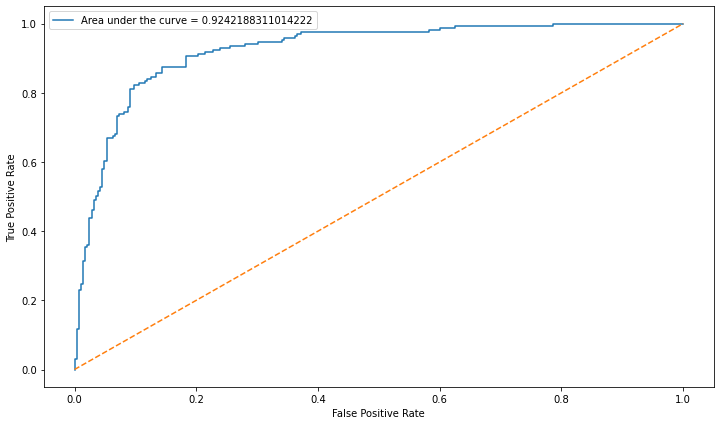

One Testing Set
Confusion Matrix: 
 [[69  3]
 [ 8 35]]
Accuracy: 0.9043478260869565


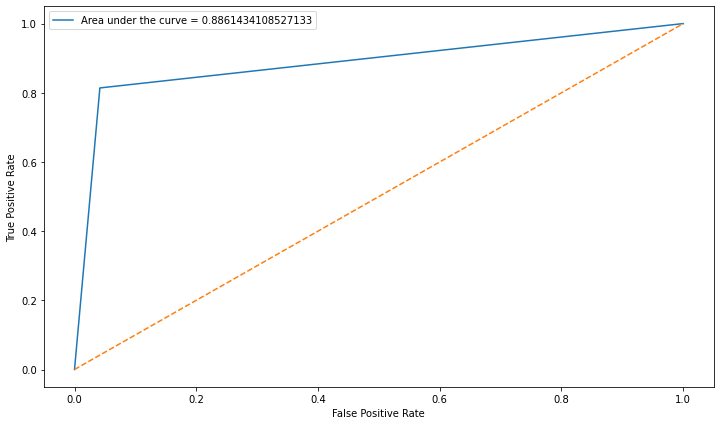

              train      test
accuracy   0.926138  0.920580
precision  0.927142  0.922318
recall     0.926138  0.920580
f1 score   0.925304  0.919549
AUC        0.926467  0.904883


In [23]:
# Get the confusion matrix and ROC curve for a training data
print("One Training Set")
confusionMatrix = confusion_matrix(trainingY_, trainingLabelPredict)
print("Confusion Matrix: \n", confusionMatrix)
trainingAccuracy = trainingClassificationReport['accuracy']
print(f'Accuracy: {trainingAccuracy}')
falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=trainingY_, y_score=reqProbab, pos_label = 'M' )
AUC = auc(falsePositiveRate, truePositiveRate)
fig,axes = plt.subplots(figsize=(12,7))
axes.plot(falsePositiveRate, truePositiveRate, label = f"Area under the curve = {AUC}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

# Get the confusion matrix and ROC curve for a testing data
print("One Testing Set")
confusionMatrix = confusion_matrix(testingY_, yPred)
print("Confusion Matrix: \n", confusionMatrix)
testingAccuracy = testingClassificationReport['accuracy']
print(f'Accuracy: {testingAccuracy}')
falsePositiveRate, truePositiveRate, threshold = roc_curve(y_true=testingY_, y_score=yProb[:,1], pos_label = 'M' )
AUC = auc(falsePositiveRate, truePositiveRate)
fig,axes = plt.subplots(figsize=(12,7))
axes.plot(falsePositiveRate, truePositiveRate, label = f"Area under the curve = {AUC}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()
  
# Find Average Score of metrics
trainingScore = pd.DataFrame.from_dict(trainingResults)
y = trainingScore.mean()
testingScore = pd.DataFrame.from_dict(testingResults)
z = testingScore.mean()
summary = pd.concat([y,z], axis = 1, keys=['train', 'test'])
print(summary)  

    v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.


- We predicted that the accuracy of the supervised learning is better than the semi-supervised learning and the semi-supervised learning is greater than the unsupervised learning. We can see that the semi-supervised learning results are closeer to the supervised learning in terms of precision, f1 scores, and recall. Moreover, the high accuracy of supervised learning is due to the availability of labels that eases the task of prediction. 

- I had trouble running KMeans and Spectral Clustering and I got really low scores. 

2. Active Learning Using Support Vector Machines

    (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is abinary classification problem.


In [20]:
# Get the data and add the columns
columnNames = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv('../data/data_banknote_authentication.csv', names=columnNames)

In [33]:
# Create a function that will split the data for training and testing
def trainTestSplit(i):
    # Randomly split the data
    bankAuthTest = data.sample(n=472, random_state = i).reset_index(drop = True)
    testIndex = list(set(data.index) - set(bankAuthTest.index))
    bankAuthTrain = data.iloc[testIndex,:].reset_index(drop = True)
    
    # Get the appropriate columns for training data
    trainingX = bankAuthTrain.iloc[:, :-1]
    trainingY = bankAuthTrain.iloc[:,-1]
    # Get the appropriate columns for testing data
    testingX = bankAuthTest.iloc[:, :-1]
    testingY = bankAuthTest.iloc[:, -1]
    
    return trainingX, trainingY, testingX, testingY

In [34]:
# Create a function that will normalize the data
def normalize(trainingSet, testingSet):
    # Use standard scaler
    normalizer = StandardScaler()
    trainingXNormalized = normalizer.fit_transform(trainingSet)
    testingXNormalized = normalizer.transform(testingSet)
    # Return normalized data
    return trainingXNormalized, testingXNormalized

    (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

    i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.


In [49]:
# Define a function that will do passive learning
def passiveLearning(gridSettings, stratifiedFolds, trainingX, trainingY, testingX, testingY):
    
    availableIndex = np.arange(0, len(trainingXNormalized))
    indexInUse = []
    accuracies = []
    
    t = 0
    
    # Do the loop while the index is greater than 0
    while len(availableIndex) > 0:        
        
        # Get a random sampled index
        sampledIndex = random.sample(availableIndex.tolist(), 10)
        
        # Make sure that there is atleast one elememt from each class is present in the first sampling
        if t ==0:
            while len(pd.unique(trainingY[sampledIndex]))!=2:
                sampledIndex = random.sample(availableIndex.tolist(), 10)
        indexInUse.extend(sampledIndex)
        availableIndex = np.setdiff1d(availableIndex, sampledIndex)
        usingTrainingX, usingTrainingY = trainingXNormalized[indexInUse], trainingY[indexInUse]
        
        # Create a grid search Cross Validation for an l1 penalized classifier and predict the testing data
        parameterGrid = GridSearchCV(estimator = LinearSVC(penalty = 'l1', dual = False, max_iter = 100000),cv = stratifiedFolds, **gridSettings)
        parameterGrid.fit(usingTrainingX, usingTrainingY)
        testingYPredict = parameterGrid.predict(testingX)
        
        # Get a classification report to get the accuracy and add it to the accuracies list
        classificationReport = classification_report(y_true = testingY, y_pred = testingYPredict, output_dict = True)
        accuracies.append(classificationReport['accuracy'])
        
        t+=1
        
    return accuracies

In [68]:
# Get the parameter dictionary for the classifier
parametersDict = {'C': np.logspace(-3,3,num = 7)}
settings = {'param_grid' : parametersDict,'scoring' : 'f1_weighted','n_jobs' : -1,'verbose' : 0}

# Run the Monte carlo simulation
scores = []
for i in range(50):
    print(f'Iteration {i}')
    
    # Randomly split the data and then normalize it
    trainingX, trainingY, testingX, testingY = trainTestSplit(i)
    trainingXNormalized, testingXNormalized = normalize(trainingX, testingX)
    
    # Run the stratified k fold cross validation 
    skf = StratifiedKFold(5, random_state = i, shuffle =  True)

    # Run the passive learning function and append the scores
    accuracy = passiveLearning(settings, skf, trainingXNormalized, trainingY, testingXNormalized, testingY)
    scores.append(accuracy)
    
    # Print the initial and final error rates
    print(f"Initial Error Rate: {1-accuracy[0]} and Final Error Rate: {1-accuracy[-1]}\n")

# Get the mean of the accuracy scores
averageAccuracyActive = np.mean(np.array(scores), axis = 0)

Iteration 0
Initial Error Rate: 0.44491525423728817 and Final Error Rate: 0.01906779661016944

Iteration 1
Initial Error Rate: 0.15889830508474578 and Final Error Rate: 0.008474576271186418

Iteration 2
Initial Error Rate: 0.2478813559322034 and Final Error Rate: 0.014830508474576232

Iteration 3
Initial Error Rate: 0.0423728813559322 and Final Error Rate: 0.008474576271186418

Iteration 4
Initial Error Rate: 0.09322033898305082 and Final Error Rate: 0.012711864406779627

Iteration 5
Initial Error Rate: 0.18432203389830504 and Final Error Rate: 0.012711864406779627

Iteration 6
Initial Error Rate: 0.1652542372881356 and Final Error Rate: 0.0021186440677966045

Iteration 7
Initial Error Rate: 0.08898305084745761 and Final Error Rate: 0.010593220338983023

Iteration 8
Initial Error Rate: 0.17372881355932202 and Final Error Rate: 0.006355932203389814

Iteration 9
Initial Error Rate: 0.23305084745762716 and Final Error Rate: 0.014830508474576232

Iteration 10
Initial Error Rate: 0.06355932

    ii. Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [69]:
# Define an active learnin function for the data
def activeLearning(gridSettings,stratifiedFolds, trainingX, trainingY, testingX, testingY):
    availableIndex = np.arange(0, len(trainingXNormalized))
    usingIndex = []
    accuracies = []
    
    # Get a random sample of 10
    sampledIndex = random.sample(availableIndex.tolist(), 10)
    while len(pd.unique(trainingY[sampledIndex]))!=2:
            sampledIndex = random.sample(availableIndex.tolist(), 10)
    usingIndex.extend(sampledIndex)
    availableIndex = np.setdiff1d(availableIndex, sampledIndex)
    
    # Run the iteration 90 times
    while len(usingIndex) <= 900 :
        
        # Get the data for the specific index
        usingTrainingX, usingTrainingY = trainingXNormalized[usingIndex], trainingY[usingIndex]
        
        # Create a grid search cross validation and train the model 
        parameterGrid = GridSearchCV(estimator = LinearSVC(penalty = 'l1', dual = False, max_iter = 100000), cv = stratifiedFolds, **gridSettings)        
        parameterGrid.fit(usingTrainingX, usingTrainingY)

        # Predic the model iwth the testing data
        testingYPredict = parameterGrid.predict(testingX)
        
        # Get the classification report to get the accuracies
        classificationReport = classification_report(y_true=testingY, y_pred=testingYPredict, output_dict=True)
        accuracies.append(classificationReport['accuracy'])

        if len(availableIndex) == 0:
            break;
        
        # Get the distances with the decision function
        distance = parameterGrid.decision_function(trainingX[availableIndex])
        indexList = np.arange(len(availableIndex))        
        indexList = sorted(indexList, key = lambda x: abs(distance[x]))
        availableIndex = availableIndex[indexList]
        usingIndex.extend(availableIndex[:10])
        availableIndex = availableIndex[10:]
        
    # Return the accuracies
    return accuracies

In [70]:
# Run the Monte carlo simulation
scores = []
for i in range(50):
    print(f'Iteration {i}')
    
    # Randomly split the data and then normalize it
    trainingX, trainingY, testingX, testingY = trainTestSplit(i)
    trainingXNormalized, testingXNormalized = normalize(trainingX, testingX)
    
    # Run the stratified k fold cross validation
    skf = StratifiedKFold(5, random_state = i, shuffle =  True)

    # Run the active learning function and append the scores
    accuracy = activeLearning(settings, skf, trainingXNormalized, trainingY, testingXNormalized, testingY)
    scores.append(accuracy)
    
    # Print the initial and final error rates
    print(f"Initial Error Rate: {1-accuracy[0]} and Final Error Rate: {1-accuracy[-1]}\n")

# Get the mean of the accuracy scores
averageAccuraciesPassive = np.mean(np.array(scores), axis = 0)

Iteration 0
Initial Error Rate: 0.012711864406779627 and Final Error Rate: 0.01906779661016944

Iteration 1
Initial Error Rate: 0.15254237288135597 and Final Error Rate: 0.008474576271186418

Iteration 2
Initial Error Rate: 0.15254237288135597 and Final Error Rate: 0.014830508474576232

Iteration 3
Initial Error Rate: 0.17372881355932202 and Final Error Rate: 0.008474576271186418

Iteration 4
Initial Error Rate: 0.288135593220339 and Final Error Rate: 0.012711864406779627

Iteration 5
Initial Error Rate: 0.02754237288135597 and Final Error Rate: 0.012711864406779627

Iteration 6
Initial Error Rate: 0.4597457627118644 and Final Error Rate: 0.0021186440677966045

Iteration 7
Initial Error Rate: 0.0826271186440678 and Final Error Rate: 0.010593220338983023

Iteration 8
Initial Error Rate: 0.0402542372881356 and Final Error Rate: 0.006355932203389814

Iteration 9
Initial Error Rate: 0.14406779661016944 and Final Error Rate: 0.014830508474576232

Iteration 10
Initial Error Rate: 0.025423728

    (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

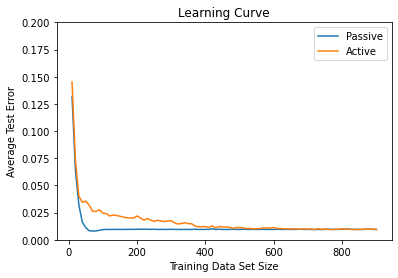

In [78]:
# Plot the Learning curve for the active and passive learning
x = np.arange(10, 901, 10)
fig = plt.figure()
plt.plot(x, 1-averageAccuraciesPassive, label = "Passive")
plt.plot(x, 1-averageAccuracyActive, label = "Active")
plt.xlabel('Training Data Set Size')
plt.ylabel('Average Test Error')
plt.ylim([0, 0.20])
plt.title("Learning Curve")
plt.legend()
plt.show()

Conclusions: 
- We can see from the chart that the passive learning curve drops more rapidly than the active learning curve. Then, it gradually decreases when the sample size is increased. However, the active learning curve drops more slowly than the passive learning. We can conclude that initially, active learning performs better than passive learning when the sample size is smaller. 